## 3. Getting Started with Neural Networks

### Building an Image Classifier using Keras & the Sequential API
In the **fashion** problem, we want to classify the image of an item to one of 10 different classes. It is a multiclasss classification problem, the same as the **reuters** problem.

In [1]:
from keras.datasets import fashion_mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

import tensorflow as tf
from tensorflow import keras as tf_keras

Using TensorFlow backend.


In [2]:
##########
# Ingestion
##########
(train_data_full, train_labels_full), (test_data, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot',]
DIMENSION_LENGTH, DIMENSION_HEIGHT = train_data_full.shape[1], train_data_full.shape[2]
DIMENSION_SIZE = train_data_full.shape[1] * train_data_full.shape[2]

The fashion dataset contains 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [3]:
# For testing
# print([td[:15] for td in train_data_full[0:3]])
# print([class_names[i] for i in train_labels_full[0:3]])

Preprocessing steps are:

1. scale pixel intensities down by dividing them by 255.0 (and also converts them to floats.

In [4]:
##########
# Preprocessing for training
##########
x_train = train_data_full/255.0
x_train__train, x_train__val = x_train[5000:], x_train[:5000]
y_train__train, y_train__val = train_labels_full[5000:], train_labels_full[:5000]

### Keras Implementation

We will use 2 dense layers for training - one of size 300 and another of size 100.
The last layer uses a softmax function of size 10, similar to that of other multiclass problems learnt.

In [5]:
##########
# Instantiate Model
##########
model = models.Sequential()
model.add(layers.Flatten(input_shape=(DIMENSION_LENGTH, DIMENSION_HEIGHT)))
model.add(layers.Dense(300, activation='relu', input_shape=(DIMENSION_SIZE,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# For testing: Get the properties of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# For testing: Get the weights of the first hidden layer
w1, b1 = model.layers[1].get_weights()
print(w1.shape)
# print(w1[:5])
print(b1.shape)
# print(b1[:5])

(784, 300)
(300,)


In [8]:
##########
# Train / Model Tuning
##########
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train__train, y_train__train, 
                    epochs=30, batch_size=128, 
                    validation_data=(x_train__val, y_train__val),
                    verbose=0)

Let's plot the loss and accuracy curves.

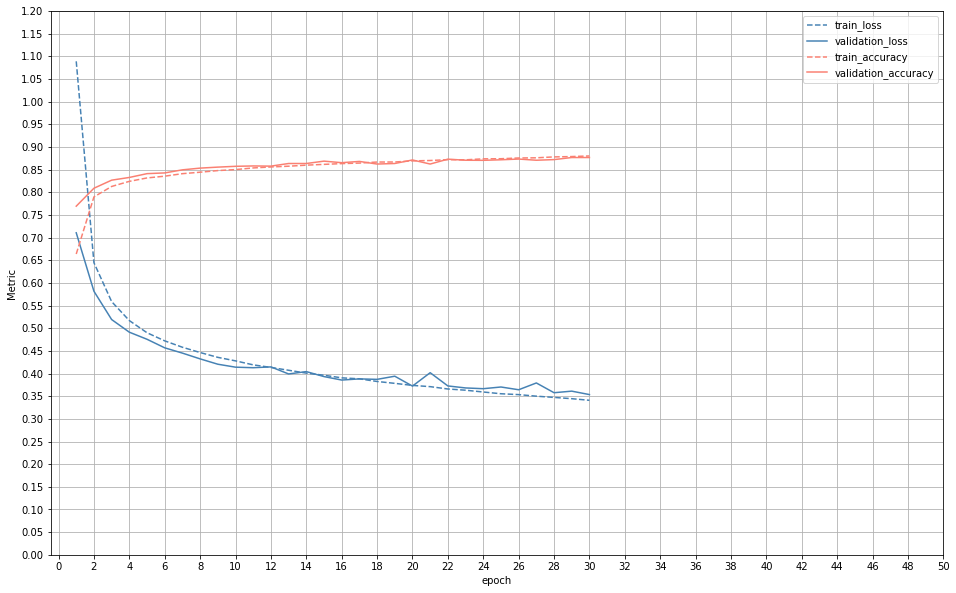

In [9]:
metrics_df = pd.DataFrame(history.history)
metrics_df['epoch'] = metrics_df.index+1

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(1,1,1)
metrics_df.plot(kind='line', x='epoch', y='loss', ax=ax1, label='train_loss', style='--', color='steelblue')
metrics_df.plot(kind='line', x='epoch', y='val_loss', ax=ax1, label='validation_loss', color='steelblue')
metrics_df.plot(kind='line', x='epoch', y='accuracy', ax=ax1, label='train_accuracy', style='--', color='salmon')
metrics_df.plot(kind='line', x='epoch', y='val_accuracy', ax=ax1, label='validation_accuracy', color='salmon')
ax1.set_ylabel("Metric")
ax1.grid('GAINSBORO')
ax1.set_xticks(range(0,51,2))
ax1.set_ylim(0,1.2)
ax1.set_yticks([r/20 for r in list(range(0,25,))])
plt.show()

Let's use 13 epochs for the final model

In [10]:
##########
# Train Tuned Model
##########
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(DIMENSION_LENGTH, DIMENSION_HEIGHT)))
model2.add(layers.Dense(300, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train__train, y_train__train, 
           epochs=13, batch_size=128, 
           validation_data=(x_train__val, y_train__val),
           verbose=0)

In [11]:
##########
# Preprocessing for test set
##########
x_test = test_data/255.0

In [12]:
##########
# Evaluate on Test Set
##########
results = model2.evaluate(x_test, test_labels)
print(results)

10000/10000 [==============================] - 1s 58us/step
[0.4351761119365692, 0.84579998254776]


The final accuracy for the model is 83%.

For the softmax problem, the output class is the class with the highest probability.

In [13]:
##########
# Predict
##########

# Using probability
print("PROBABILITY:")
prediction_probs = model2.predict(x_test)
print(prediction_probs[0])
print(np.argmax(prediction_probs[0])) # sums to 1
print()
# Using class
print("CLASS:")
prediction_classes = model2.predict_classes(x_test)
print(prediction_classes[0])
print(class_names[prediction_classes[0]])

PROBABILITY:
[1.93655724e-05 1.06156085e-05 3.78027039e-06 1.43411962e-05
 5.34030232e-06 1.04297921e-01 3.54122312e-05 2.40733534e-01
 1.74823625e-03 6.53131485e-01]
9

CLASS:
9
Ankle boot


### Tensorflow Implementation

In [14]:
##########
# Model I: Instantiate Model
##########
modeli = tf_keras.models.Sequential([
    tf_keras.layers.Flatten(input_shape=(DIMENSION_LENGTH, DIMENSION_HEIGHT)),
    tf_keras.layers.Dense(300, activation='relu', input_shape=(DIMENSION_SIZE,)),
    tf_keras.layers.Dense(100, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax'),
])

##########
# Model I: Train / Model Tuning
##########
modeli.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = modeli.fit(x_train__train, y_train__train, 
                    epochs=30, batch_size=128, 
                    validation_data=(x_train__val, y_train__val),
                    verbose=0)

In [15]:
##########
# Model I: Evaluate
##########
results = modeli.evaluate(x_test, test_labels)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8653
[0.3808850049972534, 0.8652999997138977]


In [16]:
##########
# Model I: Predict
##########

# Using probability
print("CLASS:")
prediction_classes_i = np.argmax(modeli.predict(x_test), axis=-1)
print(prediction_classes_i[0])
print(class_names[prediction_classes_i[0]])

CLASS:
9
Ankle boot
